In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import roc_curve, auc

ADDING DATASET



In [ ]:
df1 = pd.read_csv("diabetes.csv")
df2 = pd.read_csv("diabetes_Dataset_cleaned.csv")

CHECKING FOR THE NULL VALUES

In [ ]:
df1.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df1['Age'].min()

21

Cleaning the data

In [ ]:
df1=df1.drop(['Pregnancies'],axis='columns')

In [ ]:
data={'column_name':['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']}

Removal of Outliers using Z Score

In [ ]:
def eliminate_outliers(df, column_name, threshold=3):
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    df_filtered = df[z_scores <= threshold]
    return df_filtered

In [ ]:
df2=eliminate_outliers(df1,'Glucose')

In [ ]:
df3=eliminate_outliers(df2,'BloodPressure')

In [ ]:
df4=eliminate_outliers(df3,'SkinThickness')

In [ ]:
df5=eliminate_outliers(df4,'Insulin')

In [ ]:
df6=eliminate_outliers(df5,'BMI')

In [ ]:
df7=eliminate_outliers(df6,'DiabetesPedigreeFunction')

In [ ]:
df8=eliminate_outliers(df7,'Age')

In [ ]:
df8

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [ ]:
df8.dtypes

,0
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


SPLITING DATA INTO TRAINIG,TESTING AND VALIDATION DATASET

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df8['Outcome']

In [ ]:
X=df8.drop(['Outcome'],axis='columns')

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

USING LOGESTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression(penalty=None,max_iter=200,dual=False,multi_class='multinomial',fit_intercept=True,verbose=100,random_state=100)

In [ ]:
logreg_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', penalty=None,
                   random_state=100, verbose=100)

In [ ]:
y_test_pred = logreg_model.predict(X_test)

In [ ]:
y_val_pred = logreg_model.predict(X_val)

In [ ]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", val_accuracy)

Accuracy: 0.8252427184466019


In [ ]:
import pickle
with open('model_logreg.pkl','wb')as file:
  pickle.dump(logreg_model,file)

In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7980769230769231


In [ ]:
precision = precision_score(y_test, y_test_pred)
print("Precision:", precision)

Precision: 0.8620689655172413


In [ ]:
F1_Score = f1_score(y_test, y_test_pred)
print("F1_Score:",F1_Score)

F1_Score: 0.704225352112676


In [ ]:
recall = recall_score(y_test, y_test_pred)
print("Recall:", recall)

Recall: 0.5952380952380952


In [ ]:
x=np.array([148,72,35,0,33.6,0.627,50]).reshape(1,-1)
logreg_model.predict(x)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
x=np.array([85,66,29,0,26.6,0.351,31]).reshape(1,-1)
logreg_model.predict(x)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

Creating a Confusion matrix for Logistic **Regression**

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

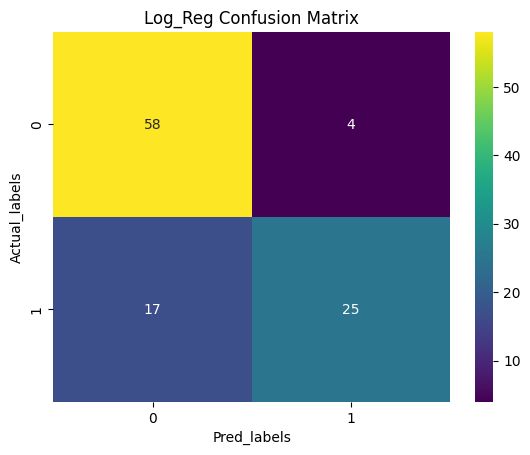

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=True, xticklabels=True, yticklabels=True)
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Log_Reg Confusion Matrix")
plt.show()

Calculating AUC and plotting the ROC curve

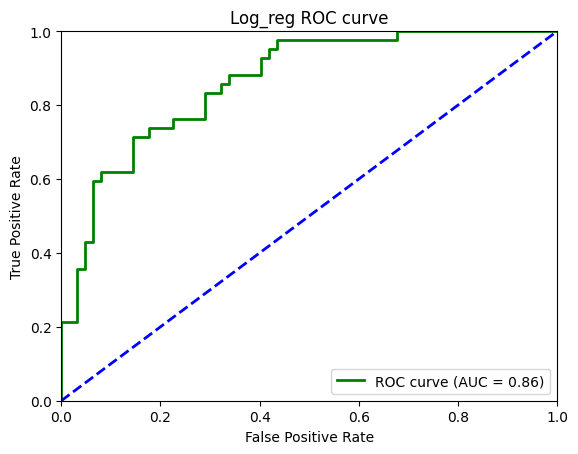

In [ ]:
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_reg ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree_model=DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=42,max_depth=None,min_samples_split=100,max_features='log2')

In [ ]:
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=100, random_state=42,
                       splitter='random')

In [ ]:
y_pred_dec = dec_tree_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dec)
print("Accuracy:", accuracy)

Accuracy: 0.7307692307692307


In [ ]:
precision = precision_score(y_test, y_pred_dec)
print("Precision:", precision)

Precision: 0.7916666666666666


In [ ]:
F1_Score = f1_score(y_test, y_pred_dec)
print("F1_Score:",F1_Score)

F1_Score: 0.5757575757575758


In [ ]:
recall = recall_score(y_test, y_pred_dec)
print("Recall:", recall)

Recall: 0.4523809523809524


Creating a Confusion Matrix for Decision Tree classifier

In [ ]:
cm_dec = confusion_matrix(y_test,y_pred_dec)

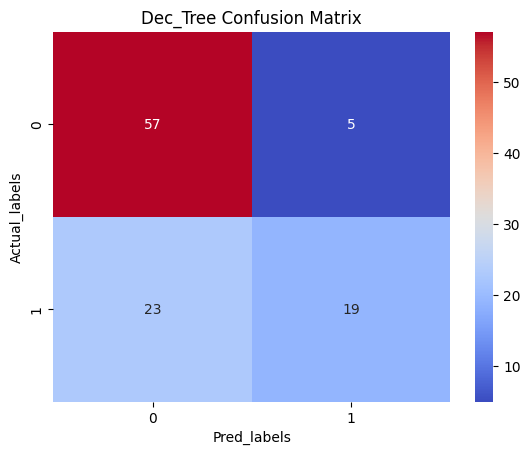

In [ ]:
sns.heatmap(cm_dec, annot=True, fmt="d", cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True,linecolor="blue")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Dec_Tree Confusion Matrix")
plt.show()

**Calculating AUC and plotting the ROC curve**

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_pred_dec)
roc_auc = auc(fpr, tpr)

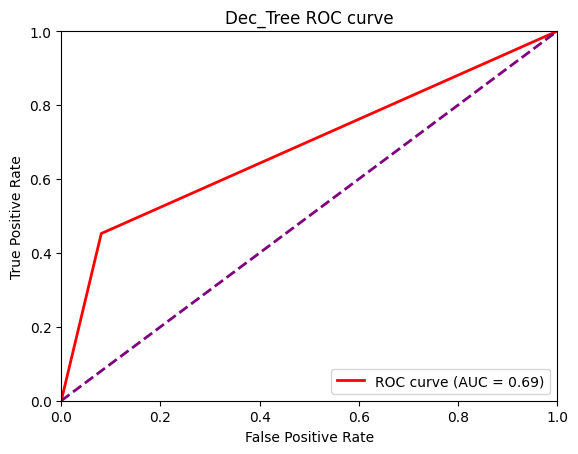

In [ ]:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dec_Tree ROC curve')
plt.legend(loc="lower right")
plt.show()

Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle

In [ ]:
rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=100,max_features='log2',bootstrap=True,random_state=42,min_samples_split=50)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='log2',
                       min_samples_split=50, n_estimators=50, random_state=42)

In [ ]:
y_pred_rf=rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.7980769230769231


In [ ]:
precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

Precision: 0.8387096774193549


In [ ]:
F1_Score = f1_score(y_test, y_pred_rf)
print("F1_Score:",F1_Score)

F1_Score: 0.7123287671232876


In [ ]:
recall = recall_score(y_test, y_pred_rf)
print("Recall:", recall)

Recall: 0.6190476190476191


In [ ]:
with open('model.pkl','wb')as file:
  pickle.dump(rf_model,file)

Creating a Confusion Matrix for Random Forest classifier

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

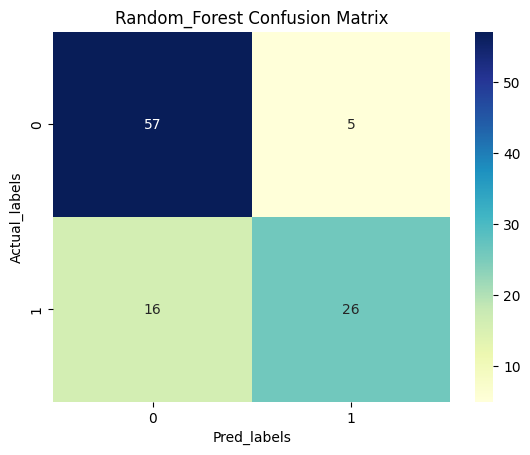

In [ ]:
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True,linecolor="green")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Random_Forest Confusion Matrix")
plt.show()

Calculating AUC and plotting the ROC curve

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

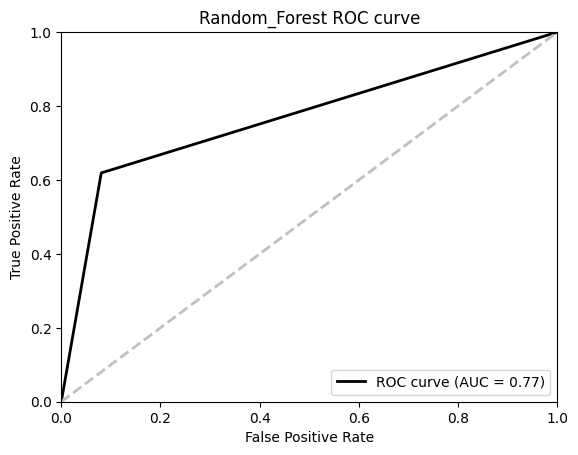

In [ ]:
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='silver', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random_Forest ROC curve')
plt.legend(loc="lower right")
plt.show()

Using Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC(kernel='linear',degree=3,probability=True,class_weight='balanced',shrinking=True)

In [ ]:
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [ ]:
y_pred_svc=svc_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Accuracy: 0.7884615384615384


In [ ]:
precision = precision_score(y_test, y_pred_svc)
print("Precision:", precision)

Precision: 0.75


In [ ]:
F1_Score = f1_score(y_test, y_pred_svc)
print("F1_Score:",F1_Score)

F1_Score: 0.7317073170731707


In [ ]:
recall = recall_score(y_test, y_pred_svc)
print("Recall:", recall)

Recall: 0.7142857142857143


Creating a Confusion Matrix for Support Vector Machine classifier

In [ ]:
cm_svc = confusion_matrix(y_test,y_pred_svc)

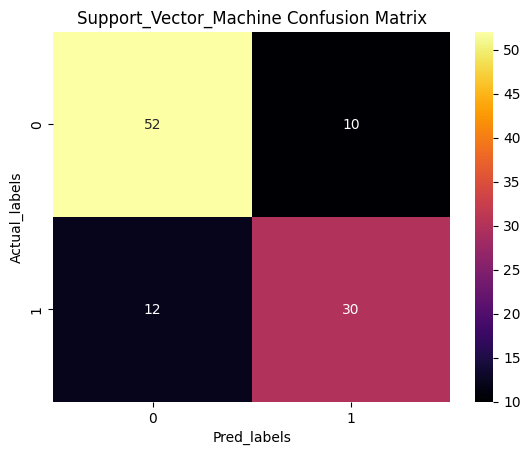

In [ ]:
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="inferno", cbar=True, xticklabels=True, yticklabels=True,linecolor="black")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Support_Vector_Machine Confusion Matrix")
plt.show()

Calculating AUC and plotting the ROC curve

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr, tpr)

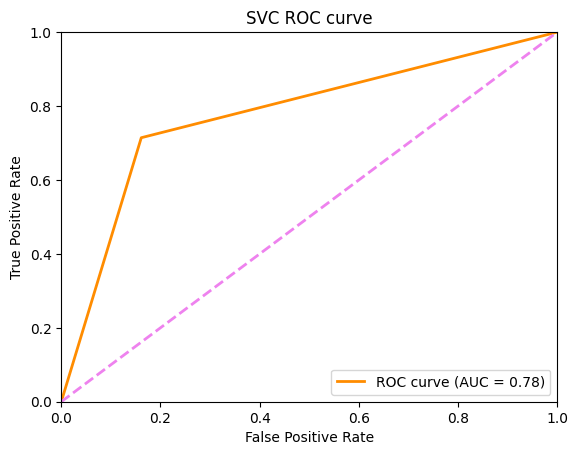

In [ ]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC curve')
plt.legend(loc="lower right")
plt.show()

Using Naive Bayes Classifier algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)


GaussianNB()

In [ ]:
y_pred_nb=nb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.7884615384615384


In [ ]:
precision = precision_score(y_test, y_pred_nb)
print("Precision:", precision)

Precision: 0.7941176470588235


In [ ]:
F1_Score = f1_score(y_test, y_pred_nb)
print("F1_Score:",F1_Score)

F1_Score: 0.7105263157894737


In [ ]:
recall = recall_score(y_test, y_pred_nb)
print("Recall:", recall)

Recall: 0.6428571428571429


Creating a Confusion Matrix for Naive Bayes classifier

In [ ]:
cm_nb = confusion_matrix(y_test,y_pred_nb)

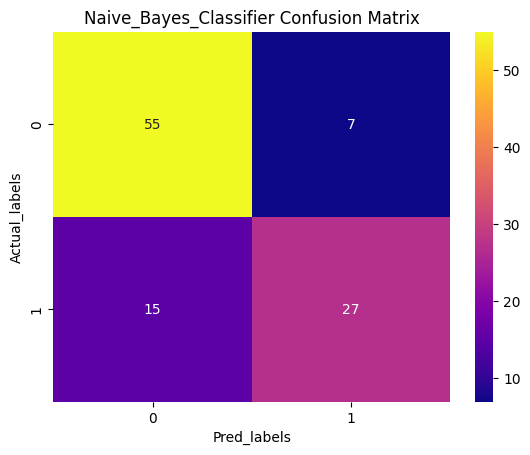

In [ ]:
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="plasma", cbar=True, xticklabels=True, yticklabels=True,linecolor="magenta")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Naive_Bayes_Classifier Confusion Matrix")
plt.show()

Calculating AUC and plotting the ROC curve

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)

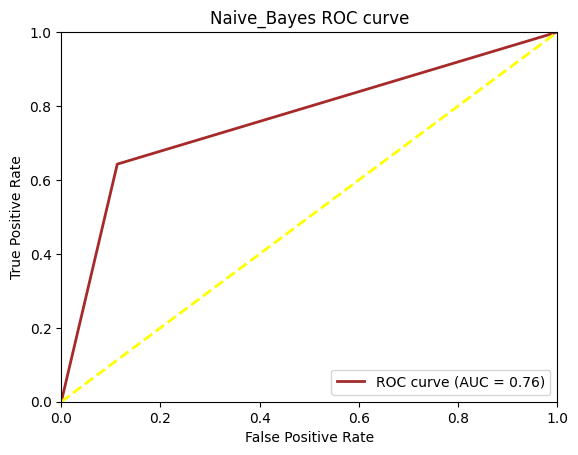

In [ ]:
plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive_Bayes ROC curve')
plt.legend(loc="lower right")
plt.show()

code generative



Evaluating models on the test set:

Logistic Regression Test Metrics:
Accuracy: 0.7981
Precision: 0.8621
Recall: 0.5952
F1-score: 0.7042


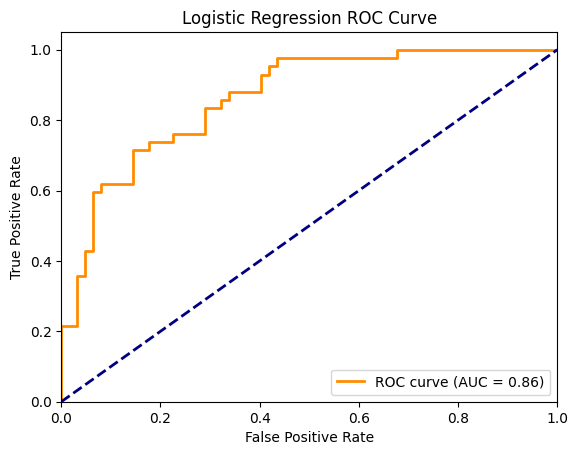


Decision Tree Test Metrics:
Accuracy: 0.7308
Precision: 0.7917
Recall: 0.4524
F1-score: 0.5758


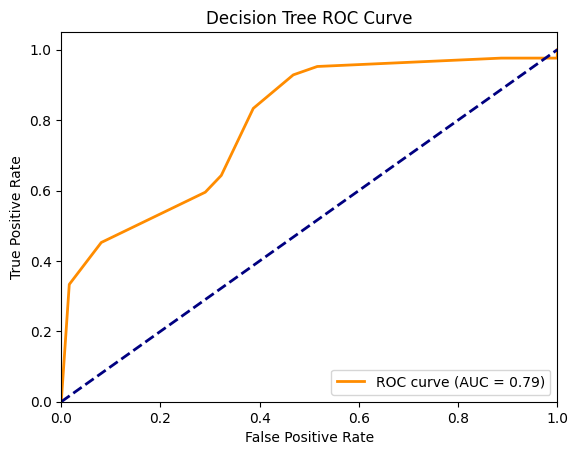


Random Forest Test Metrics:
Accuracy: 0.7981
Precision: 0.8387
Recall: 0.6190
F1-score: 0.7123


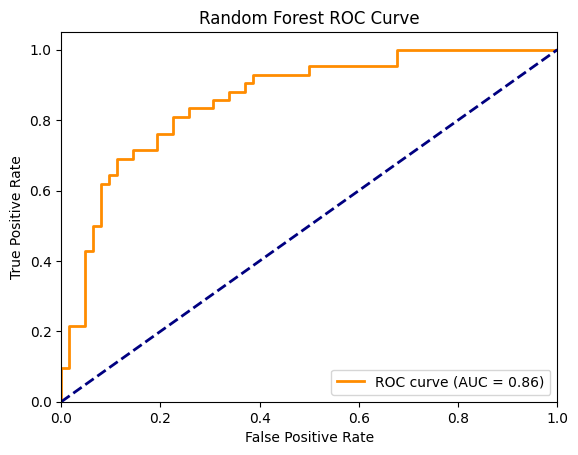


Support Vector Machine Test Metrics:
Accuracy: 0.7885
Precision: 0.7500
Recall: 0.7143
F1-score: 0.7317


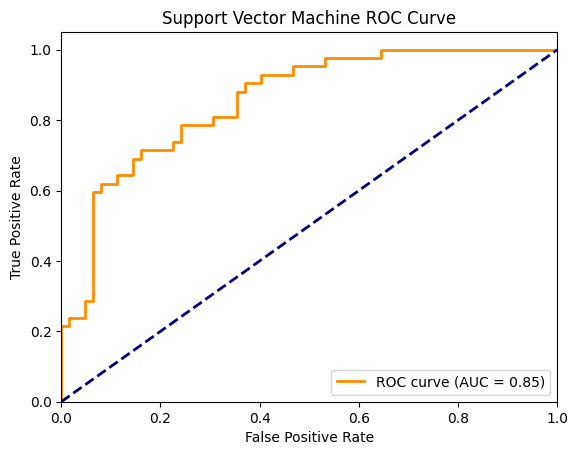


Naive Bayes Test Metrics:
Accuracy: 0.7885
Precision: 0.7941
Recall: 0.6429
F1-score: 0.7105


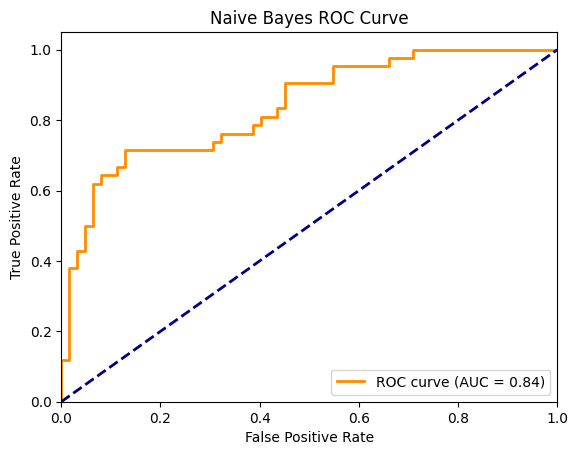

In [ ]:
# Create a dictionary of the trained models
trained_models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dec_tree_model,
    'Random Forest': rf_model,
    'Support Vector Machine': svc_model,
    'Naive Bayes': nb_model
}

# 7. Make predictions on the test set and 8. Evaluate the performance on the test set
print("\nEvaluating models on the test set:")
for name, model in trained_models.items():
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    print(f"\n{name} Test Metrics:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-score: {test_f1:.4f}")
    # 9. Calculate the AUC and plot the ROC curve for each model
    if hasattr(model, "predict_proba"):
      y_test_proba = model.predict_proba(X_test)[:, 1]
      fpr, tpr, _ = roc_curve(y_test, y_test_proba)
      roc_auc = auc(fpr, tpr)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(f'{name} ROC Curve')
      plt.legend(loc="lower right")
      plt.show()
    else:
      print(f"Model {name} does not have predict_proba method for ROC curve.")

## Exploratory Data Analysis (EDA)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


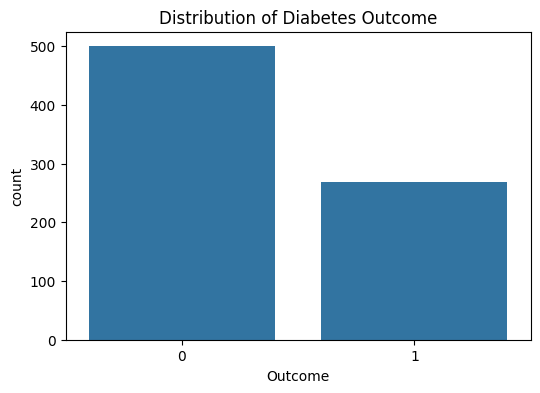

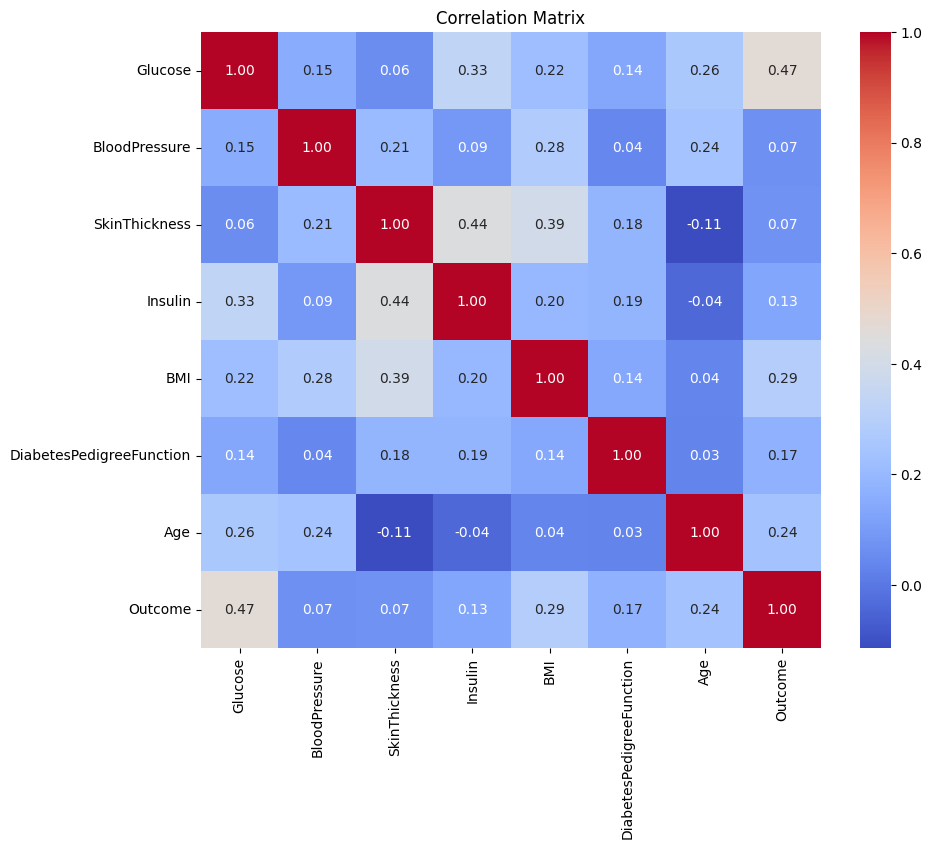

In [ ]:
# Display descriptive statistics
display(df1.describe())

# Visualize the distribution of the Outcome variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df1)
plt.title('Distribution of Diabetes Outcome')
plt.show()

# Visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data Splitting and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df8.drop('Outcome', axis=1)
y = df8['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Prediction

In [ ]:
# Using Logistic Regression as an example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df, X, and y are defined in previous cells

X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

## Model Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix:
 [[85 15]
 [26 28]]


Feature Selection Techniques

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils import class_weight

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/archive (2)/colored_images"
labels = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']
label_to_int = {label: idx for idx, label in enumerate(labels)}

In [ ]:
class_counts = {}
for cls in os.listdir(data_dir):  # <- use os.listdir here
    cls_path = os.path.join(data_dir, cls)
    count = len(os.listdir(cls_path))
    class_counts[cls] = count

print("Class distribution:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

Class distribution:
No_DR: 1805
Moderate: 999
Severe: 193
Mild: 370
Proliferate_DR: 295


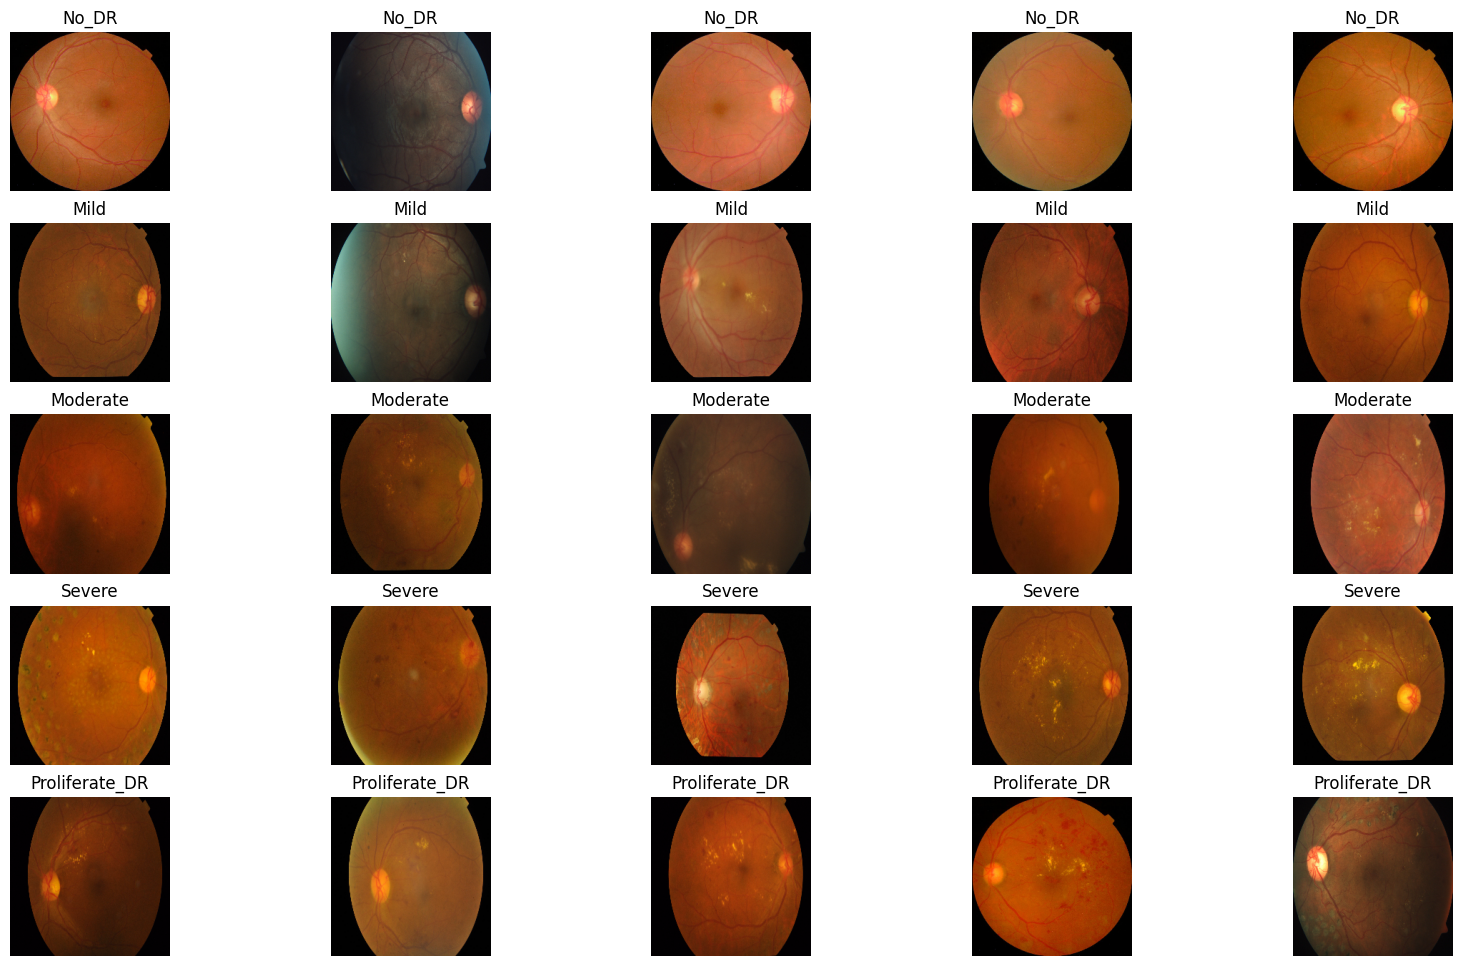

In [ ]:
# 3. Preview images using cv2
plt.figure(figsize=(20, 12))
images_per_label = 5
for i, label in enumerate(labels):
    folder_path = os.path.join(data_dir, label)
    for j in range(images_per_label):
        img_file = os.listdir(folder_path)[j]
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)                 # BGR format
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
        plt.subplot(len(labels), images_per_label, i*images_per_label + j + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
plt.show()

In [ ]:
all_labels = []
for idx, cls in enumerate(labels):
    all_labels.extend([idx]*class_counts[cls])
all_labels = np.array(all_labels)

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)
class_weights = dict(enumerate(weights))
print("Class weights:", class_weights)

Class weights: {0: np.float64(0.4057617728531856), 1: np.float64(1.9794594594594594), 2: np.float64(0.7331331331331331), 3: np.float64(3.7948186528497407), 4: np.float64(2.4827118644067796)}


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)
# Validation g

In [ ]:
# Validation generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 2931 images belonging to 5 classes.


In [ ]:
# Validation generator
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 731 images belonging to 5 classes.


In [ ]:
# Load ResNet50 without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Build Sequential model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(len(labels), activation='softmax')  # 5 classes
])

In [ ]:
# Compile
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
print("Performance Report:")
# Use the trained model named 'model' and evaluate on the validation set
y_pred10 = model.predict(val_generator)
# The validation generator provides batches of data, so we need to extract the true labels from it
y_test10 = val_generator.classes[val_generator.index_array]

# Since the output is one-hot encoded, get the class with the highest probability
y_pred10_classes = np.argmax(y_pred10, axis=1)

target = labels  # Use the actual labels from the notebook

from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test10, y_pred10_classes),4))
print('Precision score is :', np.round(metrics.precision_score(y_test10, y_pred10_classes, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test10, y_pred10_classes, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test10, y_pred10_classes, average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test10, y_pred10_classes),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test10, y_pred10_classes, target_names=target))

Performance Report:
46/46 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step
Accuracy score is : 0.2722
Precision score is : 0.0741
Recall score is : 0.2722
F1 Score is : 0.1165
Cohen Kappa Score: 0.0
		Classification Report:
                 precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        74
          Mild       0.27      1.00      0.43       199
      Moderate       0.00      0.00      0.00       361
        Severe       0.00      0.00      0.00        59
Proliferate_DR       0.00      0.00      0.00        38

      accuracy                           0.27       731
     macro avg       0.05      0.20      0.09       731
  weighted avg       0.07      0.27      0.12       731



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10, # You can adjust the number of epochs
    validation_data=val_generator,
    class_weight=class_weights
)

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 788s 4s/step - accuracy: 0.2614 - loss: 1.9380 - val_accuracy: 0.2722 - val_loss: 1.5126
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 786s 4s/step - accuracy: 0.2745 - loss: 1.8950 - val_accuracy: 0.2722 - val_loss: 1.4969
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 783s 4s/step - accuracy: 0.2686 - loss: 1.9364 - val_accuracy: 0.2722 - val_loss: 1.5012
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 729s 4s/step - accuracy: 0.2814 - loss: 1.8429 - val_accuracy: 0.2722 - val_loss: 1.5423
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 731s 4s/step - accuracy: 0.2709 - loss: 1.8390 - val_accuracy: 0.2722 - val_loss: 1.5360
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 786s 4s/step - accuracy: 0.2853 - loss: 1.8872 - val_accuracy: 0.2722 - val_loss: 1.5100
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 738s 4s/step - accuracy: 0.2757 - loss: 1.9253 - val_accuracy: 0.2722 - val_loss: 1.5029
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 723s 4s/step - accuracy: 0.2575 - loss: 1.8833 - val_accu

# Task
Predict whether a person has diabetes or not in yes/no format using the dataset "/content/drive/MyDrive/Colab Notebooks/diabetes (1).csv" and deploy the prediction model in a Streamlit server.

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes (1).csv")
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes (1).csv")
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for clarity, preserving column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled_df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [16]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
y_pred = log_reg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


Confusion Matrix:
 [[82 18]
 [26 28]]


In [21]:
!pip install streamlit -q

Write the cell py code into app.py

In [19]:
%%writefile app.py
import streamlit as st
st.write('# Diabetes Prediction')
st.write('## Logistic Regression')

Writing app.py


In [20]:
# !pip install pyngrok

In [22]:
# from pyngrok import ngrock

In [23]:
# !nohup strealit run app.py &
# url = ngrok.connect(port = '8501')
# print(url)

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.86.68:8501

⠧⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 